                                                                                
Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



## importing models

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns=999
#in feature engineering we will get lots of columns ,when that time,if you want to see all columns we use this

## loading the data set

In [3]:
df=pd.read_csv("e://machine_learning _datasets/hour.csv")  # cnt is our target variable

In [25]:
df.head()#it shows first five rows of the data set 

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# we see the some statistics information
df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.isnull().sum() #it shows if there is any null values in any variable

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#we see some information (datatypes,rows) of the data_set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
df.drop(["instant","dteday"],axis=1,inplace=True)
#it drops two columns from the dataset ,instant columns is  an id it is not useful for prediction and
#dteday columns is date  it also not useful for prediction so we must delete those columns

In [9]:
# unique values in every variable
df.apply(lambda s:len(s.unique()))

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
cnt           869
dtype: int64

In [10]:
#we have to rename the columns for better reading columns
df=df.rename(columns={"weathersit":"weather",
                     "yr":"year",
                     "mnth":"month",
                      "hr":"hour",
                      "cnt":"count"
                     })

[Text(0.5, 1.0, 'counts ')]

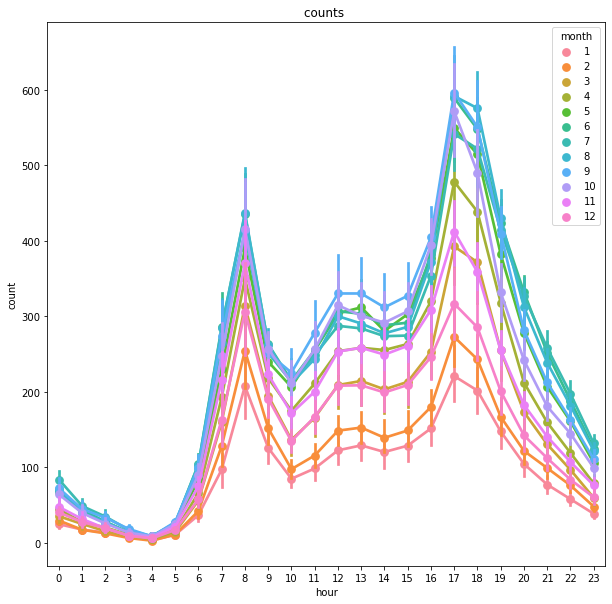

In [11]:
#show the count values by hour by monthly
fig,ax=plt.subplots(figsize=(10,10))
sns.pointplot(x="hour",y="count",data=df,hue="month")
ax.set(title="counts ")

[Text(0.5, 1.0, 'counts in per hour in every season')]

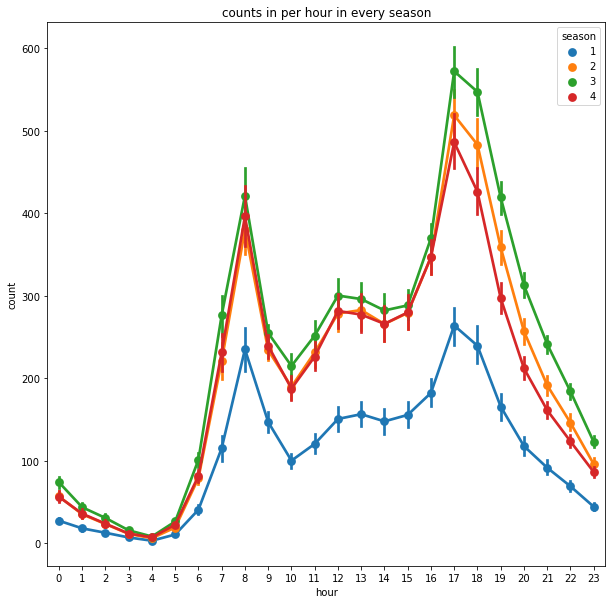

In [12]:
#showing the plot count bikes by hour in 4 seasons
fig,ax=plt.subplots(figsize=(10,10))
sns.pointplot(data=df,x="hour",y="count",hue="season")
ax.set(title="counts in per hour in every season")


In [13]:
#here we are copying the dataframe into variable data
data=df.copy()

In [14]:
#here we are converting some columns into category because in those columns values stored in string type so we have to convert
t=["month","hour","weekday","season","workingday","weather","holiday"]
for i in t:
    data[i]=data[i].astype("category")
#data.join()

[Text(0.5, 1.0, 'count per every month')]

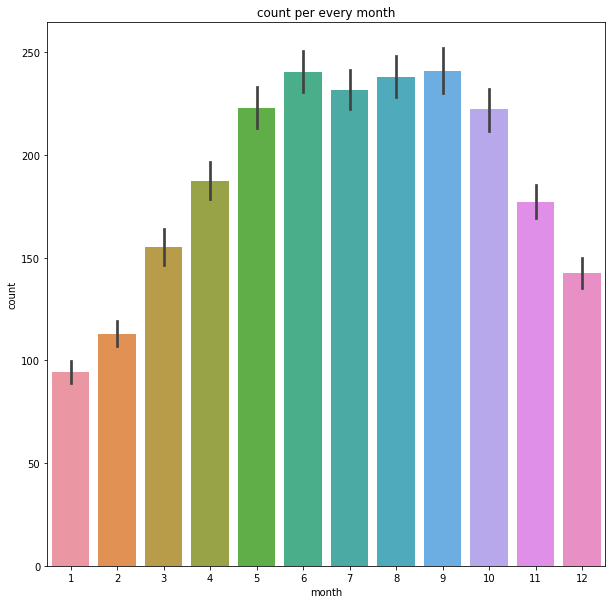

In [15]:
#here we visulize the data in which month is bike raiding highly 
fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(data=df,x="month",y="count")
ax.set(title="count per every month")

<AxesSubplot:xlabel='weekday', ylabel='count'>

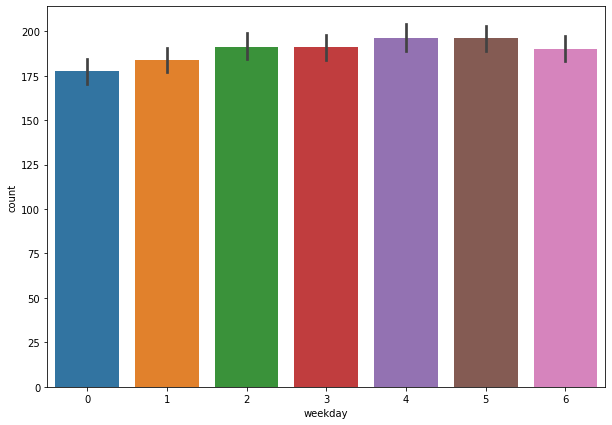

In [16]:
#here we see the daywise bikeraiding
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=df,x="weekday",y="count")

<AxesSubplot:>

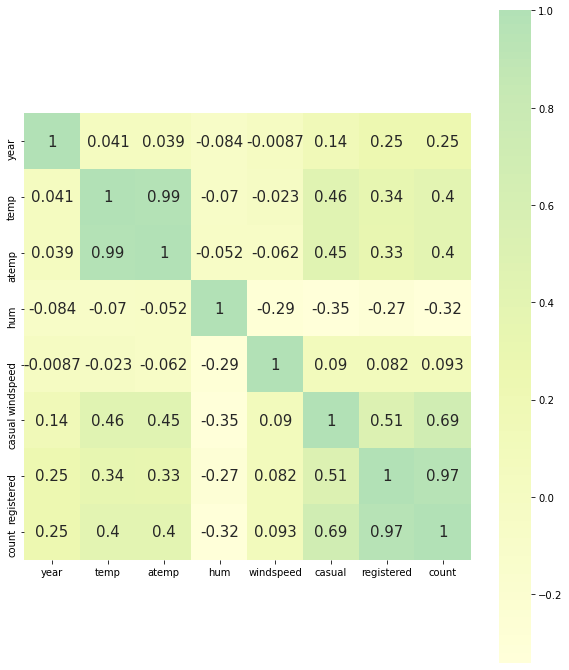

In [17]:
#here we see the correlation for count columns based on numeric columns(correlation means the relationship between the columns)
d=data.corr()
plt.figure(figsize=(10,12))
sns.heatmap(d,annot=True,annot_kws={"size":(15)},cmap="YlGnBu",center=2,robust=True,square=True)

'here temparature is increase count is also increace,and humidity is increase count is decreace'

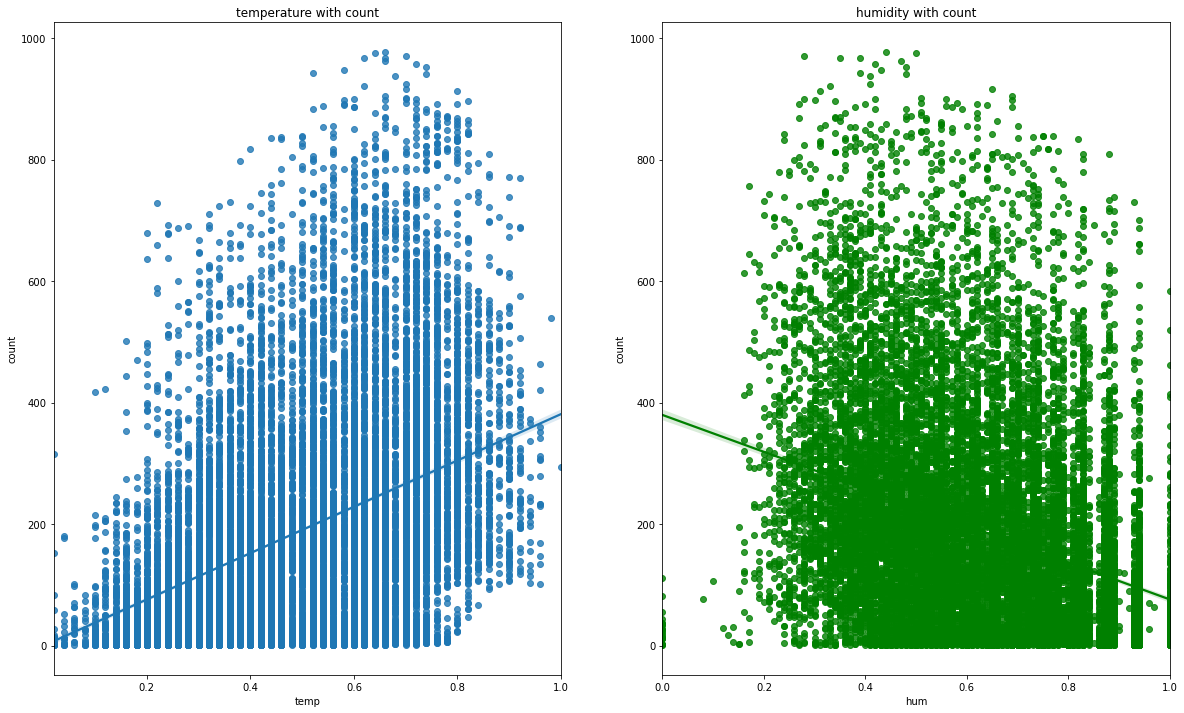

In [18]:
# regration plot with humidity and temparature
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,12))
sns.regplot(x=data["temp"],y=data["count"],ax=ax1)
ax1.set(title="temperature with count")
sns.regplot(x=data["hum"],y=data["count"],ax=ax2,color="g")
ax2.set(title="humidity with count")
"""here temparature is increase count is also increace,and humidity is increase count is decreace"""

[Text(0.5, 1.0, 'qqpolts for counts')]

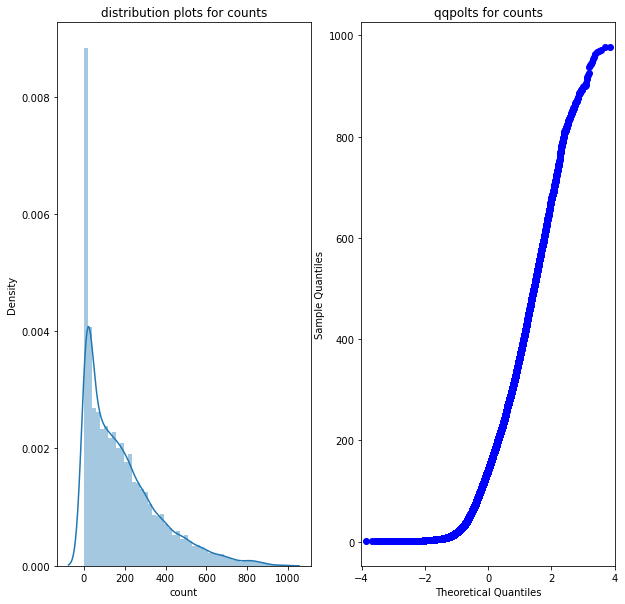

In [19]:
#here we use qqplots that means how taget variable normaly distributed
from statsmodels.graphics.gofplots import qqplot
fig,(ax,ax1)=plt.subplots(ncols=2,figsize=(10,10))
sns.distplot(data["count"],ax=ax)
ax.set(title="distribution plots for counts")
qqplot(data["count"],ax=ax1)
ax1.set(title="qqpolts for counts")

### our target variable is not normally distributed so  we have to fetch  into normal distribution by using log method

In [20]:

data["count"]=np.log(data["count"])#method1
#data["count"]=data["count"].apply(lambda s:np.log(s))  #method 2
data.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,2.772589
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,3.688879
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,3.465736
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,2.564949
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,0.000000


[Text(0.5, 1.0, 'qqplot for count')]

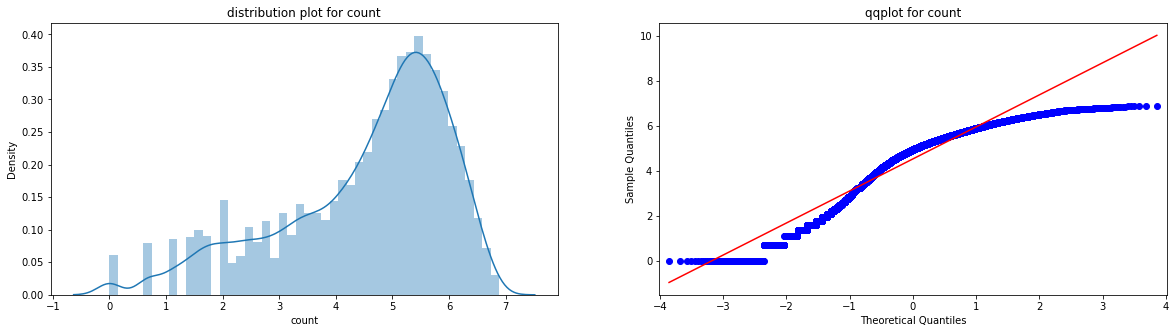

In [21]:
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
sns.distplot(data["count"],ax=ax1)
ax1.set(title="distribution plot for count")
qqplot(data["count"],ax=ax2,line="r")
ax2.set(title="qqplot for count")

In [22]:
# here we create function for converting categorical column into dummies column
def onehot_encoding(data,col):
    w=pd.get_dummies(data,columns=col,prefix=col,drop_first=True)
    return w

In [24]:
data=onehot_encoding(data,t)


### train _test _split

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
#here we are droping the some un neccesary columns for train
X=data.drop(["count","atemp","windspeed","casual","registered"],axis=1)

In [29]:
# here we are giving a target variable to y variable
Y=data["count"]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=4)

### importing some machine learning models from sklearn

In [35]:
from sklearn.linear_model import LinearRegression,Ridge,HuberRegressor,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
modles=[LinearRegression(),
      Ridge(),
      HuberRegressor(),
      ElasticNetCV(),
      DecisionTreeRegressor(),
      RandomForestRegressor(),
      GradientBoostingRegressor(),
      ExtraTreesRegressor()]

In [39]:
from sklearn import model_selection

In [45]:
def train(model):
        kfold=model_selection.KFold(n_splits=5,random_state=4)
        pred=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring="neg_mean_squared_error")
        cv_score=pred.mean()
        print("model:",model)
        print("cv_score:",abs(cv_score))

In [47]:
for model in modles:
    train(model)

model: LinearRegression()
cv_score: 0.3909420376288718
model: Ridge()
cv_score: 0.3908675863339771
model: HuberRegressor()
cv_score: 0.4205817140234635
model: ElasticNetCV()
cv_score: 0.3910658738688995
model: DecisionTreeRegressor()
cv_score: 0.4035240683992257
model: RandomForestRegressor()
cv_score: 0.20929052238803764
model: GradientBoostingRegressor()
cv_score: 0.31569902729426524
model: ExtraTreesRegressor()
cv_score: 0.19026964691869064


In [63]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

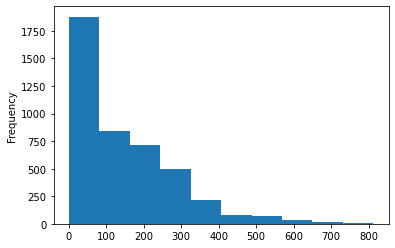

In [66]:
pd.Series(model.predict(x_test)).plot(kind="hist")

In [57]:
model.score(x_test,y_test)

0.022554660529344073